**Problem Name:**


A stroke prediction problem using different types of classification algorithms.

**Objectives:**

1. To learn about different types of data pre-processing such as feature scaling and handling missing data using SimpleImputer.

2. To acquire knowledge about different types of classification algorithms and how to use them on a dataset to predict the target column.

3. To learn about different types of performance measurement metrics.
4. To be able to employ the python library klib,for data(features column and target column) analysis.

In [ ]:
# Downloading the data
!wget -O stroke-data.csv https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0
# Importing the dataset
import pandas as pd
dataset = pd.read_csv('stroke-data.csv')
dataset # To show the dataset

--2021-12-14 01:22:37--  https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.68.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.68.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv [following]
--2021-12-14 01:22:37--  https://www.dropbox.com/s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca43bf11010f8e53627e2760062.dl.dropboxusercontent.com/cd/0/inline/BbwRcuFcSR6uGebnM52SZlkVHReE0s1clGwo1hDeWLnE2vuSWjSBt4MoqdHV7ougVcTPll7UlW6e6yA-3niUXopR220E-VtQZtJIcbQFggrFDBsZXY_QGZKr2eJt1ov4PlslIbBoxdcJ4MlVStUUfYWx/file# [following]
--2021-12-14 01:22:38--  https://uca43bf11010f8e53627e2760062.dl.dropboxusercontent.com/cd/0/inline/BbwRcuFcSR6uGebn

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Data Pre-processing:** Following the download of the classification task dataset, the following pre-processing steps are carried out, which are summarized below:
1. The columns named target and features are separated.
2. The NaN value in a specific column (bmi) is found and replaced using the SimpleImputer function with the'median' strategy.
3. The number of 0 and 1 labels in the stroke column are counted to determine the number of labels in the target column that are out of balance.
4. Both label and one-hot encoding are used in the categorical columns.
5. The klib library is used to perform the correlation of the features column with the target column.
6. Feature scaling is used to convert a large numerical value into a smaller value.
7. The features data are splitted into training (0.67) and test set (0.33) for label encoded features.


**Classification Algorithms:** The following machine learning algorithms are used to solve this stroke prediction classification problem:
1. Logistic Regression
2. K Nearest Neighbor (KNN)
3. Support Vector Machine (SVM)
4. Decision Tree Classifier
5. Random Forest Classifier
6. Naive Bayes

**Seperating the features column and the target column of the task dataset**

In [ ]:
# Creating Feature Columns
features = dataset[['gender', 'age', 'hypertension', 'heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
# Creating Target Columns
target = dataset[['stroke']]

**Showing the '0' label(4861 out of 5110) in target column 'stroke'**

In [ ]:
dataset[dataset.stroke==0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,1,3.0,0,0,0,4,0,95.12,18.000000,0,0
250,1,58.0,1,0,1,2,1,87.96,39.200000,2,0
251,0,8.0,0,0,0,2,1,110.89,17.600000,0,0
252,0,70.0,0,0,1,2,0,69.04,35.900000,1,0
253,1,14.0,0,0,0,1,0,161.28,19.100000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


**Showing the '1' label (249 out of 5110) in target column 'stroke'( Imbalance label)**

In [ ]:
dataset[dataset.stroke==1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
244,1,57.0,0,0,1,2,0,84.96,36.700000,0,1
245,0,14.0,0,0,0,4,0,57.93,30.900000,0,1
246,0,75.0,0,0,1,3,0,78.80,29.300000,1,1
247,1,71.0,1,0,1,3,0,87.80,28.893237,0,1


**Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

**Showing all the NaN value in bmi column**

In [ ]:
dataset[dataset.bmi. isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


**Replacing the NaN values of bmi column with the median of that column**

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy = "median") # imputer is an object of Imputer class
imputer = imputer.fit(features[['bmi']])
features[['bmi']]= imputer.transform(features[['bmi']])
features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


**Label Encoding the categorical columns**

In [ ]:
labelencoder_f = LabelEncoder()
#the categorical columns are represented by numeric value

features['gender'] = labelencoder_f.fit_transform(features['gender'])
features['ever_married'] = labelencoder_f.fit_transform(features['ever_married'])
features['work_type'] = labelencoder_f.fit_transform(features['work_type'])
features['Residence_type'] = labelencoder_f.fit_transform(features['Residence_type'])
features['smoking_status'] = labelencoder_f.fit_transform(features['smoking_status'])
print(features)
dataset= pd.concat([features, target ], axis=1)

dataset

      gender   age  hypertension  ...  avg_glucose_level   bmi  smoking_status
0          1  67.0             0  ...             228.69  36.6               1
1          0  61.0             0  ...             202.21  28.1               2
2          1  80.0             0  ...             105.92  32.5               2
3          0  49.0             0  ...             171.23  34.4               3
4          0  79.0             1  ...             174.12  24.0               2
...      ...   ...           ...  ...                ...   ...             ...
5105       0  80.0             1  ...              83.75  28.1               2
5106       0  81.0             0  ...             125.20  40.0               2
5107       0  35.0             0  ...              82.99  30.6               2
5108       1  51.0             0  ...             166.29  25.6               1
5109       0  44.0             0  ...              85.28  26.2               0

[5110 rows x 10 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


**Importing Klib for the co-rrelation of features with the target column**

In [ ]:
! pip install klib
import klib

**To show the co-rrelation of the features columns with target column after label encoding**

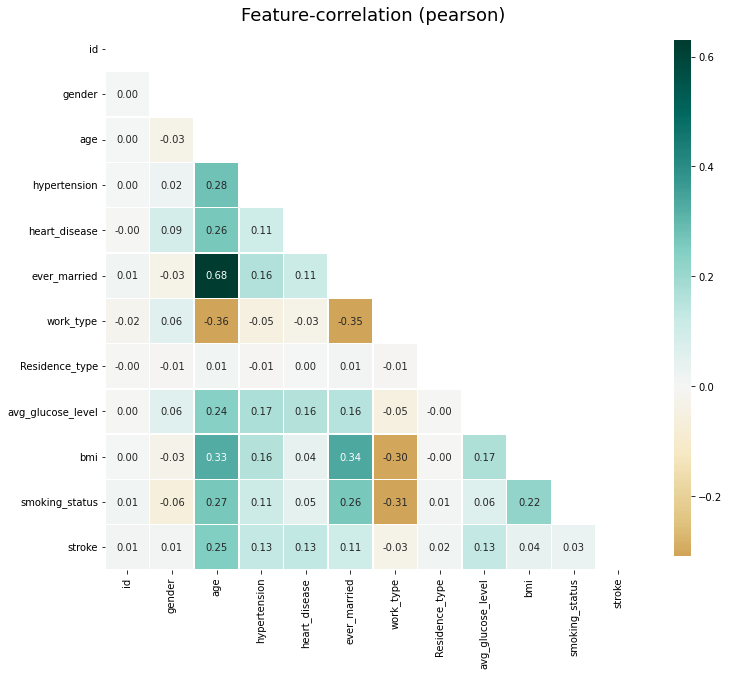

In [ ]:
klib.corr_plot(dataset)

In [ ]:
klib.corr_mat(dataset) # This returns a color-encoded correlation matrix

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.00,0.00,0.00,0.00,-0.00,0.01,-0.02,-0.00,0.00,0.00,0.01,0.01
gender,0.00,1.00,-0.03,0.02,0.09,-0.03,0.06,-0.01,0.06,-0.03,-0.06,0.01
age,0.00,-0.03,1.00,0.28,0.26,0.68,-0.36,0.01,0.24,0.33,0.27,0.25
hypertension,0.00,0.02,0.28,1.00,0.11,0.16,-0.05,-0.01,0.17,0.16,0.11,0.13
heart_disease,-0.00,0.09,0.26,0.11,1.00,0.11,-0.03,0.00,0.16,0.04,0.05,0.13
ever_married,0.01,-0.03,0.68,0.16,0.11,1.00,-0.35,0.01,0.16,0.34,0.26,0.11
work_type,-0.02,0.06,-0.36,-0.05,-0.03,-0.35,1.00,-0.01,-0.05,-0.30,-0.31,-0.03
Residence_type,-0.00,-0.01,0.01,-0.01,0.00,0.01,-0.01,1.00,-0.00,-0.00,0.01,0.02
avg_glucose_level,0.00,0.06,0.24,0.17,0.16,0.16,-0.05,-0.00,1.00,0.17,0.06,0.13
bmi,0.00,-0.03,0.33,0.16,0.04,0.34,-0.30,-0.00,0.17,1.00,0.22,0.04


**Spliting the Dataset into training set and test set**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size = 0.33,random_state = 0, stratify=target)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3423, 10)
(1687, 10)
(3423, 1)
(1687, 1)


**Feature scaling**

In [ ]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)


**Logistic Regression**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train) #Fitting into the training set
y_pred1 = lr.predict(X_test) # prediction on the test model
conf1=confusion_matrix(y_test,y_pred1) # Making the confusing matrix (actual vs prediction)
print(conf1)
print(classification_report(y_test,y_pred1,target_names = ['No','Yes']))

[[1605    0]
 [  82    0]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.98      1605
         Yes       0.00      0.00      0.00        82

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.91      0.95      0.93      1687



**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred2 = classifier.predict(X_test)
conf2=confusion_matrix(y_test,y_pred2)
print(conf2)
print(classification_report(y_test,y_pred2,target_names = ['No','Yes']))

[[1599    6]
 [  81    1]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1605
         Yes       0.14      0.01      0.02        82

    accuracy                           0.95      1687
   macro avg       0.55      0.50      0.50      1687
weighted avg       0.91      0.95      0.93      1687



**SVM**

In [ ]:

from sklearn.svm import SVC
classifier1 = SVC(kernel = 'linear', random_state = 0,C=2)
classifier1.fit(X_train,y_train)
y_pred3 = classifier1.predict(X_test)
conf3=confusion_matrix(y_test,y_pred3)
print(conf3)

print(classification_report(y_test,y_pred3,target_names = ['No','Yes']))

[[1605    0]
 [  82    0]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.98      1605
         Yes       0.00      0.00      0.00        82

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.91      0.95      0.93      1687



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred4 = classifier.predict(X_test)
conf4=confusion_matrix(y_test,y_pred4)
print(conf4)
print(classification_report(y_test,y_pred4,target_names = ['No','Yes']))

[[1523   82]
 [  67   15]]
              precision    recall  f1-score   support

          No       0.96      0.95      0.95      1605
         Yes       0.15      0.18      0.17        82

    accuracy                           0.91      1687
   macro avg       0.56      0.57      0.56      1687
weighted avg       0.92      0.91      0.92      1687



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=12, criterion ='entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred5 = classifier.predict(X_test)
conf5=confusion_matrix(y_test,y_pred5)
print(conf5)
print(classification_report(y_test,y_pred5,target_names = ['No','Yes']))

[[1596    9]
 [  81    1]]
              precision    recall  f1-score   support

          No       0.95      0.99      0.97      1605
         Yes       0.10      0.01      0.02        82

    accuracy                           0.95      1687
   macro avg       0.53      0.50      0.50      1687
weighted avg       0.91      0.95      0.93      1687



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred6 = classifier.predict(X_test)
conf6=confusion_matrix(y_test,y_pred6)
print(conf6)
print(classification_report(y_test,y_pred6,target_names = ['No','Yes']))

[[1436  169]
 [  50   32]]
              precision    recall  f1-score   support

          No       0.97      0.89      0.93      1605
         Yes       0.16      0.39      0.23        82

    accuracy                           0.87      1687
   macro avg       0.56      0.64      0.58      1687
weighted avg       0.93      0.87      0.89      1687



**All Classifier Confusion Matrix**

In [ ]:
print('The confusion matrix of the logistic regression:\n',conf1)
print('The confusion matrix of the KNN classifier: \n',conf2)
print('The confusion matrix of the Support Vector Machine: \n',conf3)
print('The confusion matrix of the Decision Tree Algorithm: \n',conf4)
print('The confusion matrix of the Random forest Classifier: \n',conf5)
print('The confusion matrix of the Naive Bayes: \n',conf6)


The confusion matrix of the logistic regression:
 [[1605    0]
 [  82    0]]
The confusion matrix of the KNN classifier: 
 [[1599    6]
 [  81    1]]
The confusion matrix of the Support Vector Machine: 
 [[1605    0]
 [  82    0]]
The confusion matrix of the Decision Tree Algorithm: 
 [[1523   82]
 [  67   15]]
The confusion matrix of the Random forest Classifier: 
 [[1596    9]
 [  81    1]]
The confusion matrix of the Naive Bayes: 
 [[1436  169]
 [  50   32]]


**All Classifier Report(features are label encoded)**

In [ ]:
logreg=classification_report(y_test,y_pred1,target_names = ['No','Yes'])
print('The performnace measurement of the logistic regression: \n ', logreg)

knn=classification_report(y_test,y_pred2,target_names = ['No','Yes'])
print('The performnace measurement of the KNN classifier:\n ', knn)

svm=classification_report(y_test,y_pred3,target_names = ['No','Yes'])
print('The performnace measurement of the Support Vector Machine:\n ', svm)

decision=classification_report(y_test,y_pred4,target_names = ['No','Yes'])
print('The performnace measurement of the Decision Tree Algorithm:\n ', decision)

rf=classification_report(y_test,y_pred5,target_names = ['No','Yes'])
print('The performnace measurement of the Random forest Classifier:\n ', rf)

naive=classification_report(y_test,y_pred6,target_names = ['No','Yes'])
print('The performnace measurement of the Naive Bayes:\n ', naive)

The performnace measurement of the logistic regression: 
                precision    recall  f1-score   support

          No       0.95      1.00      0.98      1605
         Yes       0.00      0.00      0.00        82

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.91      0.95      0.93      1687

The performnace measurement of the KNN classifier:
                precision    recall  f1-score   support

          No       0.95      1.00      0.97      1605
         Yes       0.14      0.01      0.02        82

    accuracy                           0.95      1687
   macro avg       0.55      0.50      0.50      1687
weighted avg       0.91      0.95      0.93      1687

The performnace measurement of the Support Vector Machine:
                precision    recall  f1-score   support

          No       0.95      1.00      0.98      1605
         Yes       0.00      0.00      0.00        82

    accur

**One Hot Encoding**

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(features[['gender','ever_married','work_type','Residence_type','smoking_status']]))
encoded_labels.columns = encoder.get_feature_names(['gender','ever_married','work_type','Residence_type','smoking_status'])
dataset= pd.concat([features, encoded_labels ], axis=1)
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender_0,gender_1,gender_2,ever_married_0,ever_married_1,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
new_features = dataset[['age','hypertension', 'heart_disease','avg_glucose_level','bmi','smoking_status_3','smoking_status_1','smoking_status_2','Residence_type_0','Residence_type_1']]
new_features

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_3,smoking_status_1,smoking_status_2,Residence_type_0,Residence_type_1
0,67.0,0,1,228.69,36.600000,0.0,1.0,0.0,0.0,1.0
1,61.0,0,0,202.21,28.893237,0.0,0.0,1.0,1.0,0.0
2,80.0,0,1,105.92,32.500000,0.0,0.0,1.0,1.0,0.0
3,49.0,0,0,171.23,34.400000,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.000000,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0.0,0.0,1.0,0.0,1.0
5106,81.0,0,0,125.20,40.000000,0.0,0.0,1.0,0.0,1.0
5107,35.0,0,0,82.99,30.600000,0.0,0.0,1.0,1.0,0.0
5108,51.0,0,0,166.29,25.600000,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(new_features,target,test_size = 0.20,random_state = 0)
print("The shape of train set",X_train.shape)
print("The shape of test set",X_test.shape)

X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train) #Fitting into the training set
y_pred1 = lr.predict(X_test) # prediction on the test model
conf1=confusion_matrix(y_test,y_pred1) # Making the confusing matrix (actual vs prediction)
print(conf1)
print('The performnace measurement of the logistic regression: \n ',classification_report(y_test,y_pred1,target_names = ['No','Yes']))

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)
y_pred2 = classifier.predict(X_test)
conf2=confusion_matrix(y_test,y_pred2)
print(conf2)
print('The performnace measurement of the KNN classifier:\n ',classification_report(y_test,y_pred2,target_names = ['No','Yes']))

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)
y_pred3 = classifier.predict(X_test)
conf3=confusion_matrix(y_test,y_pred3)
print(conf3)
print('The performnace measurement of the SVC classifier:\n ',classification_report(y_test,y_pred3,target_names = ['No','Yes']))

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred4 = classifier.predict(X_test)
conf4=confusion_matrix(y_test,y_pred4)
print(conf4)
print('The performnace measurement of the Decision Tree classifier:\n ',classification_report(y_test,y_pred4,target_names = ['No','Yes']))

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=12, criterion ='entropy', random_state = 2)
classifier.fit(X_train,y_train)
y_pred5 = classifier.predict(X_test)
conf5=confusion_matrix(y_test,y_pred5)
print(conf5)
print('The performnace measurement of the RF classifier:\n ',classification_report(y_test,y_pred5,target_names = ['No','Yes']))

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred6 = classifier.predict(X_test)
conf6=confusion_matrix(y_test,y_pred6)
print(conf6)
print('The performnace measurement of the Naive bayes classifier:\n ',classification_report(y_test,y_pred6,target_names = ['No','Yes']))

The shape of train set (4088, 10)
The shape of test set (1022, 10)
[[968   0]
 [ 54   0]]
The performnace measurement of the logistic regression: 
                precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

[[952  16]
 [ 51   3]]
The performnace measurement of the KNN classifier:
                precision    recall  f1-score   support

          No       0.95      0.98      0.97       968
         Yes       0.16      0.06      0.08        54

    accuracy                           0.93      1022
   macro avg       0.55      0.52      0.52      1022
weighted avg       0.91      0.93      0.92      1022

[[968   0]
 [ 54   0]]
The performnace measurement of the SVC classifier:
                precision    recall  f1-score  

**Findings:**
1. For feature column selection, the Klib library is used, and the highest co-related feature with the target column is found to be 'age' (0.25), while the lowest co-related feature is work type (-0.03). The co-rrelated value of the id and gender feature columns with the target column is found to be 0.01. As a result, after one-hot encoding, the work type, id, and gender feature columns in new features are not taken.

2. The developed classification model is trained using both labeled (10 features without id) and one-hot (7 features without id, work type, gender) features.

3. Using label encoded features, the KNN, Random Forest, and SVM achieved the highest accuracy of 95%. The Naive Bayes method yielded the lowest accuracy of 87%.

4. The precision, recall, and F1-score for the 'yes' target label are all zero in the SVM classification model. This is due to the target column having an imbalance label of 0 (No) and 1 (Yes) ('0'=4861 and '1'=249). This means that some labels(1) in y test are never predicted by y pred.

5. To address the aforementioned issue(4), more data is provided in the test set (0.33), and'stratify=target' is used to ensure that there is some balance between each class label in the target column.

6. Because the 'No' and 'Yes' labels are imbalanced in the target column, weighted F1-score is observed from the developed classification model. The highest weighted F1-score obtained from the KNN, Random Forest classifier model is 93%.

7. The highest weighted F1-score of the RF classifier model obtained from the hot encoded features (new features) is 93%. The weighted F1-scores of the linear regression, KNN, SVC, Decision tree, Random Forest, and Naive Bayes classifiers models are: 92%, 92%, 92%, 93%, and 90%, respectively. In this case, the train set is splitted into 80% and the test set is splitted into 20%.


**Discussion:**
1. The SimpleImputer library is used to handle NaN values in the bmi column by using the median of that column.

2. The regularization parameter C is set to 2 in the support vector machine classifier model (label encoded features), and the 'linear' kernel is used.

3. The default parameters are used in the Naive Bayes classifier, and the number of trees is set to 12 in the random forest classifier.

4. From the classification report, along with precision, recall, F1-score, average accurcay and weighted F1-score is observed.

5. The lowest correlated feature found in the color-encoded correlation matrix is work type, which has a negative value of -0.03 and also indicates no correlation with the target column.



